**The Objective of the Heart Disease Prediction Project**

The goal of our heart disease prediction project is to determine if a patient should be diagnosed with heart disease or not, which is a binary outcome, so:

Positive result = 1, the patient will be diagnosed with heart disease.

Negative result = 0, the patient will not be diagnosed with heart disease. 

We have to find which classification model has the greatest accuracy and identify correlations in our data. Finally, we also have to determine which features are the most influential in our heart disease diagnosis. 

**Features**

We use the following 13 features (X) to determine our predictor (Y):

    Age.
    Sex: 1 = Male, 0 = Female.
    (cp) chest pain type (4 values – Ordinal), 1st value: typical angina, 2nd value: atypical angina, 3rd value: non-anginal pain, 4th value: asymptomatic.
    (trestbps) resting blood pressure.
    (chol) serum cholesterol.
    (Fbs) – fasting blood sugar > 120 mg/dl. 
    (restecg) – resting electrocardiography results.
    (thalach) – maximum heart rate achieved. 
    (exang) – exercise-induced angina.
    (oldpeak) – ST depression caused by exercise relative to rest.
    (slope) – the slope of the peak exercise ST segment.
    (ca) – the number of major vessels colored by fluoroscopy.
    (thal) – maximum heart rate achieved (Ordinal), 3 = normal, 6 = fixed defect, 7 = reversible defect.


# New Section

**Step #1: Data Wrangling**

We’ll first look at the dataset we are working with by converting it into a simpler and more understandable format. It would help us use the data more appropriately. 

In [ ]:
import numpy as np

import pandas as pd

import matplotlib as plt

import seaborn as sns

import matplotlib.pyplot as plt

filePath = '/heart.csv' 

data = pd.read_csv(filePath)

data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Just as the code above helped us display our data in tabular form, we will use the following code for further data wrangling:

In [ ]:
print("(Rows, columns): " + str(data.shape))

data.columns

(Rows, columns): (303, 14)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

The above code will show the total number of rows and columns and the column names in our dataset. The total number of rows and columns in our data is 303 and 14 respectively. Now we will find the number of unique values for every variable by using the following function:

In [ ]:
data.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Similarly, the following function summarizes the mean, count, standard deviation, minimum and maximum for the numeric variables:

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Step #2: Conducting EDA** 

Now that we have completed data wrangling, we can perform exploratory data analysis. Here are the primary tasks we will perform in this stage of our heart disease prediction project: 

**Finding Correlations**

We’ll create a correlation matrix that helps us see the correlations between different variables:

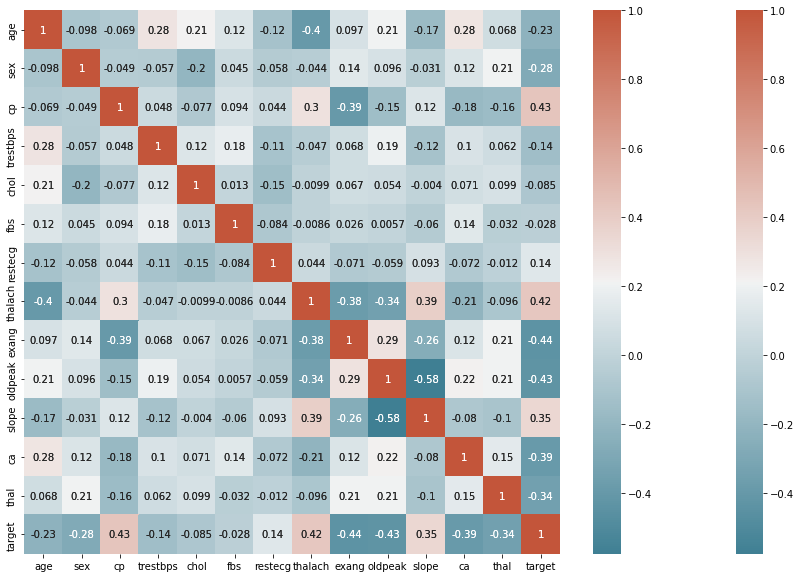

In [ ]:
corr = data.corr()

plt.subplots(figsize=(15,10))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

sns.heatmap(corr, xticklabels=corr.columns,

           yticklabels=corr.columns,

           annot=True,

           cmap=sns.diverging_palette(220, 20, as_cmap=True))

To find immediate correlations between features, we can also create pairplots. We’ll use small pairplots with only the continuous variables to look deeper into the relationships:

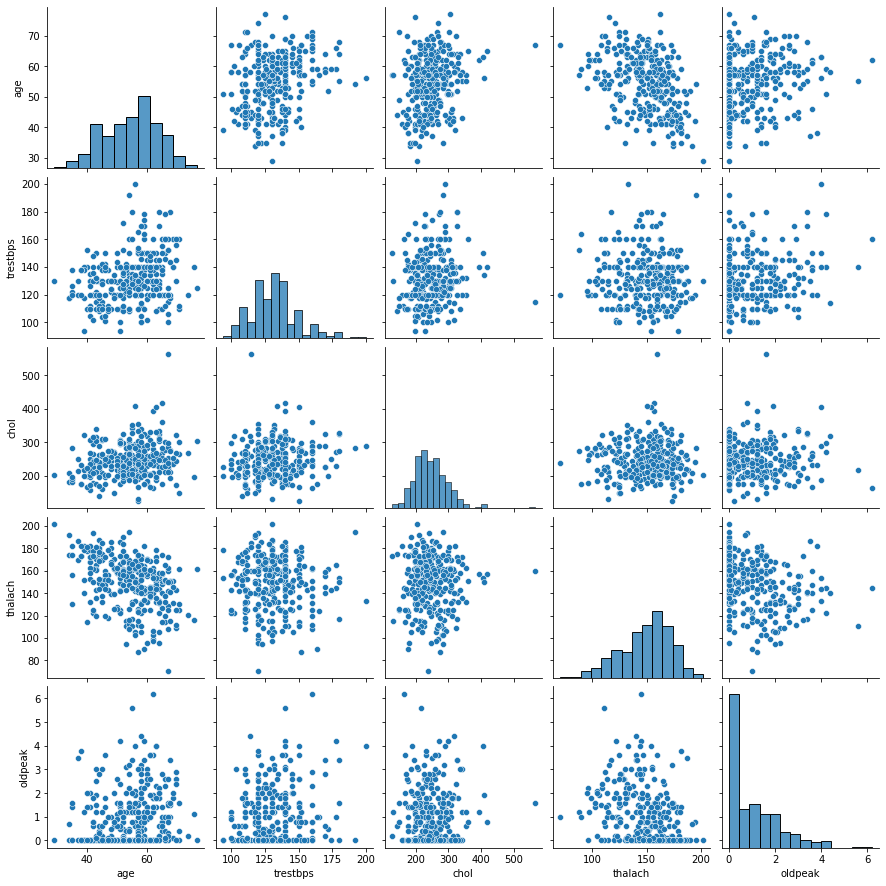

In [ ]:
subData = data[['age','trestbps','chol','thalach','oldpeak']]

sns.pairplot(subData)

***Using Violin and Box Plots***

With Violin and Box plots we can see the basic statistics and distribution of our data. You can use it to compare the distribution of a specific variable across different categories. It will help us identify outliers in the data as well. Use the following code:

Text(0, 0.5, 'Thalach Level')

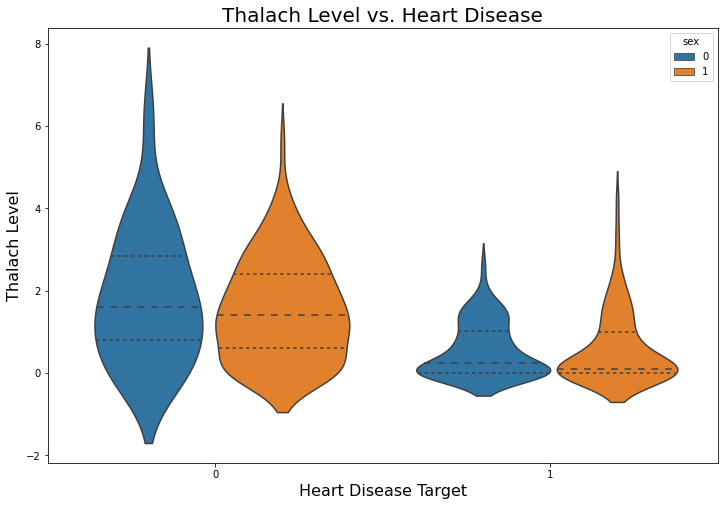

In [ ]:
plt.figure(figsize=(12,8))

sns.violinplot(x= 'target', y= 'oldpeak',hue='sex', inner='quartile',data=data)

plt.title("Thalach Level vs. Heart Disease",fontsize=20)

plt.xlabel("Heart Disease Target", fontsize=16)

plt.ylabel("Thalach Level", fontsize=16)

In the first Violin and Box plot, we find that the positive patients have a lower median for ST depression than the negative patients. So, we’ll use a plot to compare ST depression level and heart disease.

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

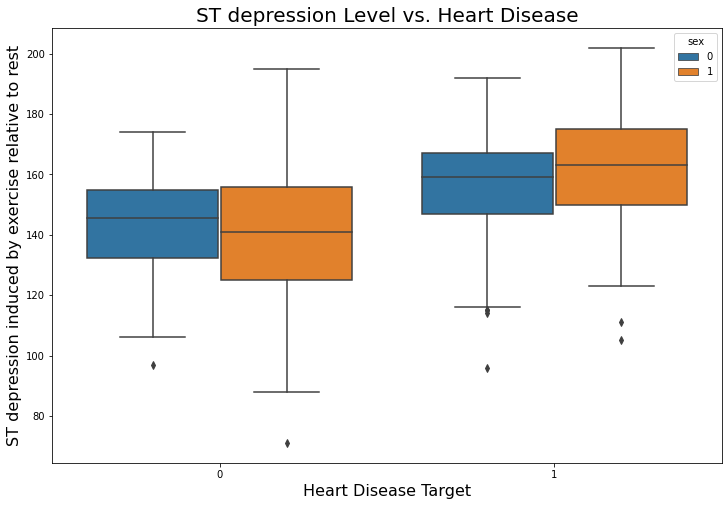

In [ ]:
plt.figure(figsize=(12,8))

sns.boxplot(x= 'target', y= 'thalach',hue='sex', data=data )

plt.title("ST depression Level vs. Heart Disease", fontsize=20)

plt.xlabel("Heart Disease Target",fontsize=16)

plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)

Here, the positive patients had a higher median for ST depression level in comparison to negative patients.

**Filtering Data**

Now we’ll filter the data according to positive and negative heart disease patients. We’ll start with filtering data by Positive heart disease patients:

In [ ]:
pos_data = data[data['target']==1]

pos_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


Similarly, we’ll filter the data according to negative heart disease patients:

In [ ]:
pos_data = data[data['target']==0]

pos_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


**Step #3: Using Machine Learning Algorithms**
Preparation

Here, we’ll prepare the data for training by assigning the features to X and the last column to the predictor Y and then, we’ll split the data into two sets, training set and test set: 

In [ ]:
x = data.iloc[:, :-1].values

y = data.iloc[:, -1].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

Finally, we’ll normalize the data so its distribution will have a mean of 0:

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

**Training the Model**

In this section, we’ll use multiple machine learning algorithms and find the one that offers the highest accuracy:

**1st Model: Logistic Regression**

In [ ]:
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model

model1.fit(x_train, y_train) # Train/Fit model

y_pred1 = model1.predict(x_test) # get y predictions

print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



**2nd Model: K-NN (K-Nearest Neighbours)**

In [ ]:
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() # get instance of model

model2.fit(x_train, y_train) # Train/Fit model

y_pred2 = model2.predict(X_test) # get y predictions

print(classification_report(y_test, y_pred2)) # output accuracy

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



**3rd Model: Support Vector Machine (SVM)**

In [ ]:
from sklearn.metrics import classification_report

from sklearn.svm import SVC

model3 = SVC(random_state=1) # get instance of model

model3.fit(x_train, y_train) # Train/Fit model

y_pred3 = model3.predict(x_test) # get y predictions

print(classification_report(y_test, y_pred3)) # output accuracy

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



**4th Model: Naive Bayes Classifier**

In [ ]:
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB() # get instance of model

model4.fit(x_train, y_train) # Train/Fit model

y_pred4 = model4.predict(x_test) # get y predictions

print(classification_report(y_test, y_pred4)) # output accuracy

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



**5th Model: Random Forest**

In [ ]:
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model

model6.fit(x_train, y_train) # Train/Fit model

y_pred6 = model6.predict(x_test) # get y predictions

print(classification_report(y_test, y_pred6)) # output accuracy

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



**6th Model: XGBoost**

In [ ]:
from xgboost import XGBClassifier

model7 = XGBClassifier(random_state=1)

model7.fit(x_train, y_train)

y_pred7 = model7.predict(x_test)

print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68        30
           1       0.69      0.71      0.70        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



After testing different ML algorithms, we found that the best one was Random Forest as it gave us the optimal accuracy of 80%. 

Keep in mind that any accuracy percentage higher than 80% is too good to be true, and it might be because of overfitting. That’s why 80% is the optimal number to reach. 

**Step #4: Finding Feature Score**

Here, we’ll find the Feature Score, which helps us make important decisions by telling us which feature was the most useful for our model:

In [ ]:
# get importance

importance = model6.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):

   print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07814
Feature: 1, Score: 0.04206
Feature: 2, Score: 0.16580
Feature: 3, Score: 0.07477
Feature: 4, Score: 0.07587
Feature: 5, Score: 0.00828
Feature: 6, Score: 0.02014
Feature: 7, Score: 0.12772
Feature: 8, Score: 0.06950
Feature: 9, Score: 0.09957
Feature: 10, Score: 0.04677
Feature: 11, Score: 0.11667
Feature: 12, Score: 0.07473


We found that the top four features were chest pain type (cp), maximum heart rate achieved (thalach), number of major vessels (ca) and ST depression caused by exercise relative to rest (oldpeak). 

**Conclusion**

Congratulations, you have now successfully completed the heart disease prediction project. We had 13 features, out of which we found that the most important ones were chest pain type and maximum heart rate achieved. 

We tested out six different ML algorithms and found that the most accurate algorithm was Random Forest.